In [37]:
# import necessary packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
data = pd.read_csv('adult.csv')
print(data.head())
print(data.describe())

   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country incom

In [39]:
# check missing values if any
print(data.isnull().sum()) # 0 missing parameters

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


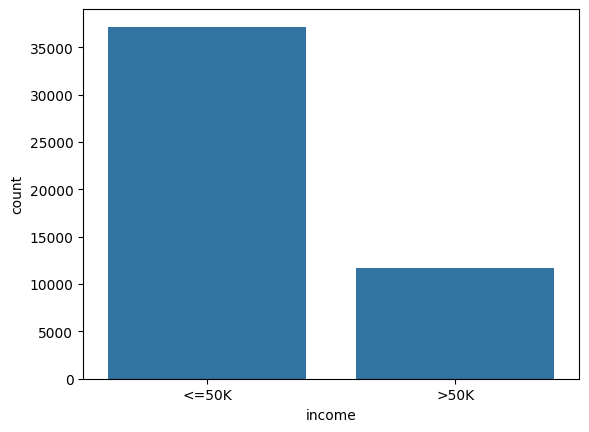

In [40]:
# data visualization
sns.countplot(x='income', data=data)
plt.show()

In [41]:
# encode categorical params/features
categorical_features = [col for col in data.columns if data[col].dtype == 'object']
le = LabelEncoder()
for col in categorical_features:
    data[col] = le.fit_transform(data[col])

In [42]:
X = data.drop('income', axis=1)
y = data['income']
# choose 80% data for learning and randomizing of splits based on number 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# scale features/params
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
# train log_reg model
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [45]:
# train SVM (support vector machine) model using SVC (SV classifier)
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

SVC()

In [46]:
# evaluate models
lr_predictions = lr_model.predict(X_test_scaled)
svm_predictions = svm_model.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))

Logistic Regression Accuracy: 0.8272085167366158
SVM Accuracy: 0.8554611526256526
